In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy.random import seed
# from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping
from keras.models import Model
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.model_selection import train_test_split


df = pd.read_csv('/content/drive/My Drive/dataset/csv_files/merged_features_22_10.csv')
text =df['LineText']

df= df.drop(columns=['Unnamed: 0', 'Identifier','LineText','BlockwiseNumber','LtoR', 'RtoL','DtoU', 'UtoD','RtoL_last','RtoL_next','DtoU_last','UtoD_last'])

df=df.fillna(0)
labelcsv=pd.read_csv('/content/drive/My Drive/dataset_22_10/merged_labels_22_10.csv')
labelcsv=labelcsv.fillna(0)
labelcsv['Label'].astype(int)
labelcsv = labelcsv.drop(columns=['Unnamed: 0'])

label= labelcsv['Label'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.33, random_state=42)

print(df.shape,df.columns,labelcsv.shape)

df.head(100)

(615029, 17) Index(['VerticalSpaceLength', 'IsStartCap', 'IsEndDot', 'IsStartSpace',
       'NormSize', 'FontWeight', 'LineLength', 'start_digit', 'start_asterisk',
       'start_parenthesis', 'DtoU_next', 'LtoR_last', 'LtoR_next', 'UtoD_next',
       'Num_of_caps', 'Ends_with_comma', 'Number_of_commas'],
      dtype='object') (615029, 2)


,VerticalSpaceLength,IsStartCap,IsEndDot,IsStartSpace,NormSize,FontWeight,LineLength,start_digit,start_asterisk,start_parenthesis,DtoU_next,LtoR_last,LtoR_next,UtoD_next,Num_of_caps,Ends_with_comma,Number_of_commas
0,4.162960e-08,1,0,1,1.00,2.0,0.166667,0.0,0.0,0.0,0.532268,0.5,0.5,0.529001,3,0,0
1,4.162960e-08,1,0,1,1.00,2.0,0.166667,0.0,0.0,0.0,0.532268,0.5,0.5,0.529001,3,0,0
2,2.141676e-02,1,0,1,0.75,0.0,0.935897,0.0,0.0,0.0,0.519287,0.5,0.5,0.519506,3,0,0
3,2.141676e-02,1,0,1,0.75,0.0,0.935897,0.0,0.0,0.0,0.519287,0.5,0.5,0.519506,3,0,0
4,8.325920e-08,0,0,0,0.75,0.0,0.948718,0.0,0.0,0.0,0.519287,0.5,0.5,0.519506,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.369614e-05,0,0,0,0.75,0.0,0.948718,0.0,0.0,0.0,0.519287,0.5,0.5,0.519506,1,0,0
96,1.248888e-07,0,0,0,0.75,0.0,0.884615,0.0,0.0,0.0,0.519287,0.5,0.5,0.519506,5,0,0
97,1.248888e-07,0,0,0,0.75,0.0,0.884615,0.0,0.0,0.0,0.519287,0.5,0.5,0.519506,5,0,0
98,4.162960e-08,0,1,0,0.75,0.0,0.448718,0.0,0.0,0.0,0.529105,0.5,0.5,0.532246,1,0,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ncol = df.shape[1]

print(ncol)

### Define the encoder dimension
encoding_dim = 5

17


In [ ]:
#design autoencoder
input_dim = Input(shape = (ncol, ))

# Encoder Layers

encoded1 = Dense(18, activation = 'relu')(input_dim)
encoded2 = Dense(10, activation = 'relu')(encoded1)
encoded4 = Dense(encoding_dim, activation = 'relu',name='latent')(encoded2)

decoded1 = Dense(10, activation = 'relu')(encoded4)
decoded2 = Dense(18, activation = 'relu')(decoded1)
decoded3 = Dense(ncol, activation = 'relu')(decoded2)


autoencoder = Model(inputs = input_dim, outputs = decoded3)

autoencoder.compile(optimizer='sgd', loss='mse')

# autoencoder.save_weights('weights.h5')

In [ ]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 18)                324       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                190       
_________________________________________________________________
latent (Dense)               (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 18)                198       
_________________________________________________________________
dense_4 (Dense)              (None, 17)               

In [ ]:

callback = EarlyStopping(monitor='loss', patience=1)
autoencoder.fit(df, df, epochs=400, batch_size=32,callbacks=[callback])

#while training with labeled dataset passing labels
autoencoder.fit(df, label-1, epochs=400, batch_size=32,callbacks=[callback])


Epoch 1/400
19220/19220 [==============================] - 18s 937us/step - loss: 0.4326
Epoch 2/400
19220/19220 [==============================] - 18s 949us/step - loss: 0.4185
Epoch 3/400
19220/19220 [==============================] - 18s 938us/step - loss: 0.4180
Epoch 4/400
19220/19220 [==============================] - 18s 937us/step - loss: 0.4179
Epoch 5/400
19220/19220 [==============================] - 18s 940us/step - loss: 0.4178
Epoch 6/400
19220/19220 [==============================] - 18s 935us/step - loss: 0.4178
Epoch 7/400
19220/19220 [==============================] - 18s 934us/step - loss: 0.4177
Epoch 8/400
19220/19220 [==============================] - 18s 935us/step - loss: 0.4177
Epoch 9/400
19220/19220 [==============================] - 18s 923us/step - loss: 0.4177
Epoch 10/400
19220/19220 [==============================] - 16s 831us/step - loss: 0.4177
Epoch 11/400
19220/19220 [==============================] - 15s 800us/step - loss: 0.4177
Epoch 12/400
19220/

In [ ]:

from sklearn.cluster import KMeans
import pickle

#Use Encoder level to reduce dimension of train and test data
encoder = Model(inputs = input_dim, outputs = encoded4)
encoded_df=pd.DataFrame(data=encoder.predict(df))
encoded_df=encoded_df.replace([np.inf, -np.inf], np.nan)
encoded_df.fillna(0.0)
kmeans = KMeans(n_clusters=3,random_state=0,max_iter=1000)
y_pred_kmeans = kmeans.fit_predict(encoded_df)

# pickle.dump(kmeans, open("/content/drive/My Drive/dataset/code/save_kmeans_03_nov", "wb"))

# autoencoder.save('/content/drive/My Drive/dataset/code/autoencoder_03_nov.hdf5')


In [ ]:
import tensorflow as tf
import pickle
# # autoencoder_large_20_10_layer.hdf5
autoencoder= tf.keras.models.load_model('/content/drive/My Drive/dataset/code/autoencoder_03_nov.hdf5')

encoder = Model(autoencoder.input, autoencoder.layers[3].output)
kmeans = pickle.load(open('/content/drive/My Drive/dataset/code/save_kmeans_03_nov','rb'))
# kmeans = KMeans(n_clusters=3,random_state=0,max_iter=1000)
encoded_df=pd.DataFrame(data=encoder.predict(df))
encoded_df=encoded_df.replace([np.inf, -np.inf], np.nan)
encoded_df.fillna(0.0)
y_pred = kmeans.fit_predict(encoded_df)


In [ ]:
from sklearn.utils.linear_assignment_ import linear_assignment

def cluster_acc(y_true, y_pred):
    """
    Calculate clustering accuracy. Require scikit-learn installed
    # Arguments
        y: true labels, numpy.array with shape `(n_samples,)`
        y_pred: predicted labels, numpy.array with shape `(n_samples,)`
    # Return
        accuracy, in [0,1]
    """
    y_true = y_true.astype(np.int64)
    assert y_pred.size == y_true.size
    D = max(y_pred.max(), y_true.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_pred.size):
        w[y_pred[i], y_true[i]] += 1
    ind = linear_assignment(w.max() - w)
    # [w[i, j] for i, j in ind]
    print(ind)
    return sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

print(cluster_acc(label-1, y_pred_kmeans))
print(y_pred_kmeans)


[[0 1]
 [1 0]
 [2 2]]
0.9999333364768166
[2 2 1 ... 0 0 2]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import networkx as nx
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

epsilon = 15.0
minsamples=149
dbscan = DBSCAN(eps=epsilon, min_samples=minsamples)
dbscan_pred = dbscan.fit_predict(encoder.predict(df))
clusters = unique(yhat)
new_df['dbscan_cluster'] = yhat

optics = OPTICS(eps=0.8, min_samples=10)
# fit model and predict clusters
optics_pred = optics.fit_predict(encoder.predict(df))

y_pred_db=new_df["dbscan_cluster"]
y_true_db=label
db_acc=cluster_acc(y_true_db, y_pred_db)


ag = AgglomerativeClustering(n_clusters=3)
agglomerative_result = ag.fit_predict(data)
clusters = unique(agglomerative_result)
  
new_df['ag_cluster'] = agglomerative_result

y_pred_agg=new_df["ag_cluster"]
y_true_agg=label
ag_acc=cluster_acc(y_true_agg, y_pred_agg)

print("ag_acc",ag_acc)
data=encoded_train_df.fillna(0)
data_array=data.to_numpy()
guassianmodel = GaussianMixture(n_components=3)

guassianmodel = guassianmodel.fit_predict(data)
new_df=pd.DataFrame(data=data)
new_df['gm_cluster'] = guassianmodel

y_pred_gmm=new_df["gm_cluster"]
y_true_gmm=y_test1
dbscan=cluster_acc(label-1, dbscan_pred)

op=cluster_acc(label-1, optics_pred)
print("dbscan",dbscan)

**Evaluation**

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

new_df["KMeans_cluster"].replace({1: 3}, inplace=True)
new_df["KMeans_cluster"].replace({2: 1}, inplace=True)
new_df["KMeans_cluster"].replace({0: 2}, inplace=True)

acc=accuracy_score(y_test, new_df["KMeans_cluster"])
print('kmeans Accuracy: %f' % acc)

precision = precision_score(y_test, new_df["KMeans_cluster"],average='micro')
print('kmeans_Precision: %f' % precision)
# # recall: tp / (tp + fn)
recall = recall_score(y_test, new_df["KMeans_cluster"],average='micro')
print('kmeans_Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, new_df["KMeans_cluster"],average='micro')
print('kmeans_ F1 score: %f' % f1)



kmeans Accuracy: 0.999916
kmeans_Precision: 0.999916
kmeans_Recall: 0.999916
kmeans_ F1 score: 0.999916


In [ ]:
new_df['text'] = text
final_df = new_df[['text','KMeans_cluster']]
final_df=final_df.drop_duplicates(subset ="text",keep = 'first') 
final_df.head(50)

,text,KMeans_cluster
0,LHC energies,3
2,The evolution of Earth-Moon system is descri...,2
4,fluid model proposed in the Meeting of Divisio...,2
6,American Physical Society. The current behavio...,2
8,with this model very well and the general patt...,2
10,Moon-Earth system described by this model agre...,2
12,evidence. The closest distance of the Moon to ...,2
14,"billion years ago, which is far beyond the Roc...",2
16,that the tidal friction may not be the primary...,2
18,Earth-Moon system. The average dark matter fie...,2


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
cluster_labels= new_df['KMeans_cluster']
colorlist =["tomato","antiquewhite","blueviolet","cornflowerblue","darkgreen","seashell","skyblue","mediumseagreen"]
#Calculate the average of silhouette scores
silhouette_avg = silhouette_score(encoded_train_df,cluster_labels)
each_silhouette_score = silhouette_samples(data,cluster_labels,metric="euclidean")

print(silhouette_avg)
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower =10
for i in range(3):
    ith_cluster_silhouette_values = each_silhouette_score[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)
    
    #label the silhouse plots with their cluster numbers at the middle
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))
    
    #compute the new y_lower for next plot
    y_lower = y_upper +10 
    
ax.set_title("Silhuoette plot")
ax.set_xlabel("Silhouette score")
ax.set_ylabel("Cluster label")
    
#the vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    
ax.set_yticks([])
ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

ValueError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(label, cluster_labels)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

Elbow method

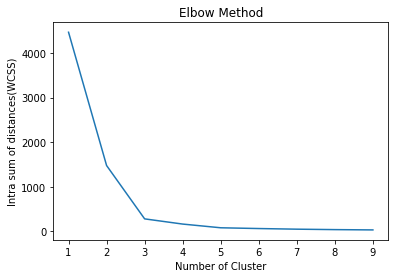

In [ ]:
#elbow method
max_cluster = 10
clusters = range(1,max_cluster)
intra_sum_of_square_list = []
for k in clusters:
    km = KMeans(n_clusters=k,init="k-means++",n_init=10,max_iter=300)
    km.fit(data)
    intra_sum_of_square_list.append(km.inertia_)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("Elbow Method")
ax.set_xlabel("Number of Cluster")
ax.set_ylabel("Intra sum of distances(WCSS)")
plt.plot(clusters,intra_sum_of_square_list)

Validation

In [ ]:

#cross validation code

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# prepare multi-class classification dataset
def create_dataset():
  X = df
  y = label
  return X,y

# The number of hidden neurons should be between the size of the input layer and the size of the output layer.
# The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
# The number of hidden neurons should be less than twice the size of the input layer.
# fit model with given number of nodes, returns test set accuracy

def evaluate_model(n_nodes,m_nodes,k_nodes, X,y):
	# configure the model based on the data
  n_input, n_classes = df.shape[1], 3 #y_train.shape[0]
  model = Sequential()
  model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(m_nodes, activation='relu'))
  model.add(Dense(k_nodes, activation='sigmoid'))
	# compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(loss='kld', optimizer=opt, metrics=['accuracy'])
	# fit model on train set
  model.fit(X, y,epochs=20, batch_size=1, verbose=1)
	# evaluate model on test set
  _, test_acc = model.evaluate(df, label,verbose=1)
  return  test_acc

# prepare dataset
X,y = create_dataset()
# evaluate model and plot learning curve with given number of nodes
num_nodes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
k_nodes=3
m_nodes=7
n_nodes=15
for m_nodes in num_nodes:
	# evaluate model with a given number of nodes
	result = evaluate_model(n_nodes,m_nodes,k_nodes,X,y)
	# summarize final test set accuracy
	print('nodes=',n_nodes, m_nodes, k_nodes, result)
	# plot learning curve
#	pyplot.plot(history.history['loss'], label=str(n_nodes))
# show the plot
#pyplot.legend()
#pyplot.show()
#17,2,4
#15 2 3 0.81

Epoch 1/20
558/558 [==============================] - 0s 848us/step - loss: 0.2589 - accuracy: 0.0789
Epoch 2/20
558/558 [==============================] - 0s 852us/step - loss: 0.0373 - accuracy: 0.0789
Epoch 3/20
558/558 [==============================] - 0s 843us/step - loss: 0.0218 - accuracy: 0.0789
Epoch 4/20
558/558 [==============================] - 0s 826us/step - loss: 0.0155 - accuracy: 0.0789
Epoch 5/20
558/558 [==============================] - 0s 819us/step - loss: 0.0120 - accuracy: 0.0986
Epoch 6/20
558/558 [==============================] - 0s 858us/step - loss: 0.0098 - accuracy: 0.1254
Epoch 7/20
558/558 [==============================] - 0s 799us/step - loss: 0.0083 - accuracy: 0.1201
Epoch 8/20
558/558 [==============================] - 0s 811us/step - loss: 0.0072 - accuracy: 0.1541
Epoch 9/20
558/558 [==============================] - 0s 787us/step - loss: 0.0063 - accuracy: 0.1470
Epoch 10/20
558/558 [==============================] - 0s 784us/step - loss: 0.005